In [1]:
from complexity_clusters import *

/users/eleves-b/2023/keyvan.attarian/EA/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-12-12 16:54:12.387462: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-12 16:54:12.403038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.random.seed(42)

In [3]:
root = Path("/Data/rc/data/causalitylink_sample")

In [4]:
filtered_marker_df = prepare_filtered_marker_table(root,None)

Loading AVRO files at /Data/rc/data/causalitylink_sample/Markers/year=2025/month=01: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
Loading AVRO files at /Data/rc/data/causalitylink_sample/Tree: 100%|██████████| 1/1 [00:00<00:00, 30.08it/s]
INFO: Initial marker table: 79221358 entries, 192261 markers, 1209808 articles
INFO: After tree & country filter: 59117755 entries, 28789 markers, 1205775 articles
INFO: After publisher join: 57742020 entries, 28676 markers, 1185862 articles


In [6]:
list_themes = ["sante", "economie", "sport", "politique", "transport", "information"]

In [7]:
selected_markers, conv, markers_journals = select_markers_by_theme(filtered_marker_df, list_themes, fraction= 1/3, top=True )

/users/eleves-b/2023/keyvan.attarian/EA/complexity_clusters.py:166: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  markers_journals = np.array(selected_markers_df["publishers_label"].to_list())


In [8]:
cocitation_matrix = compute_cocitation_probability_matrix(selected_markers, filtered_marker_df, conv)

INFO: Computing cocitation counts for 56536217 entries, 6500 markers, 1184347 articles
computing cocitation counts: 100%|██████████| 1184347/1184347 [00:13<00:00, 88387.08it/s]


In [9]:
lift_matrix = compute_lift_matrix(cocitation_matrix)

/users/eleves-b/2023/keyvan.attarian/EA/.venv/lib64/python3.9/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/users/eleves-b/2023/keyvan.attarian/EA/.venv/lib64/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


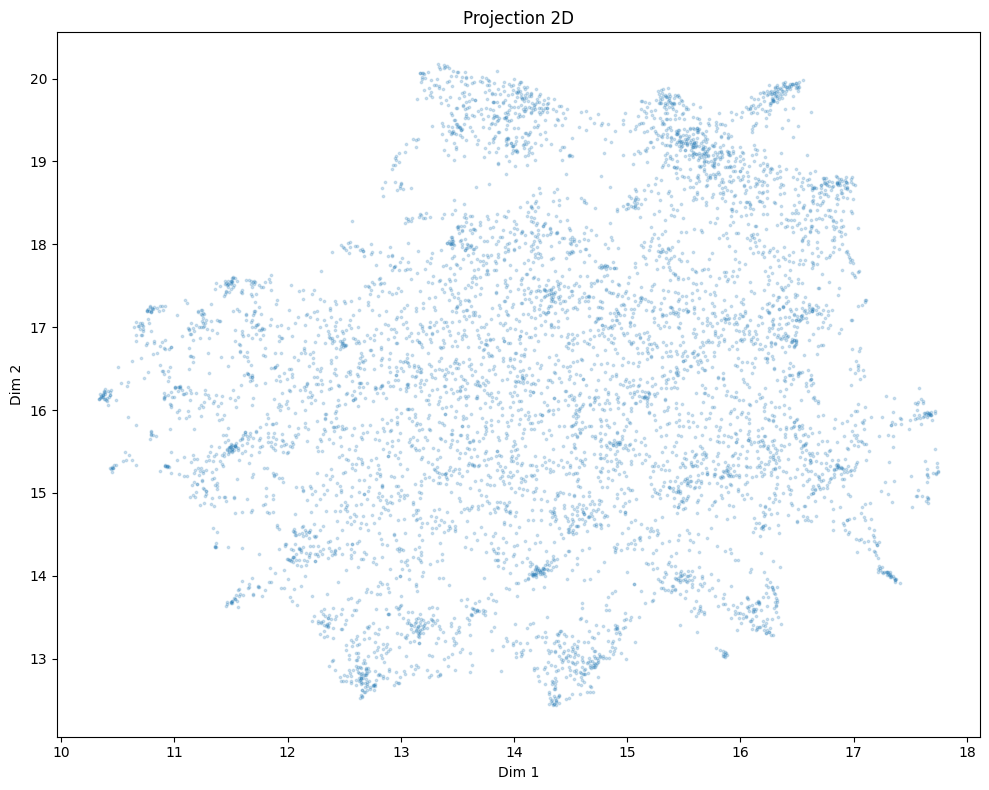

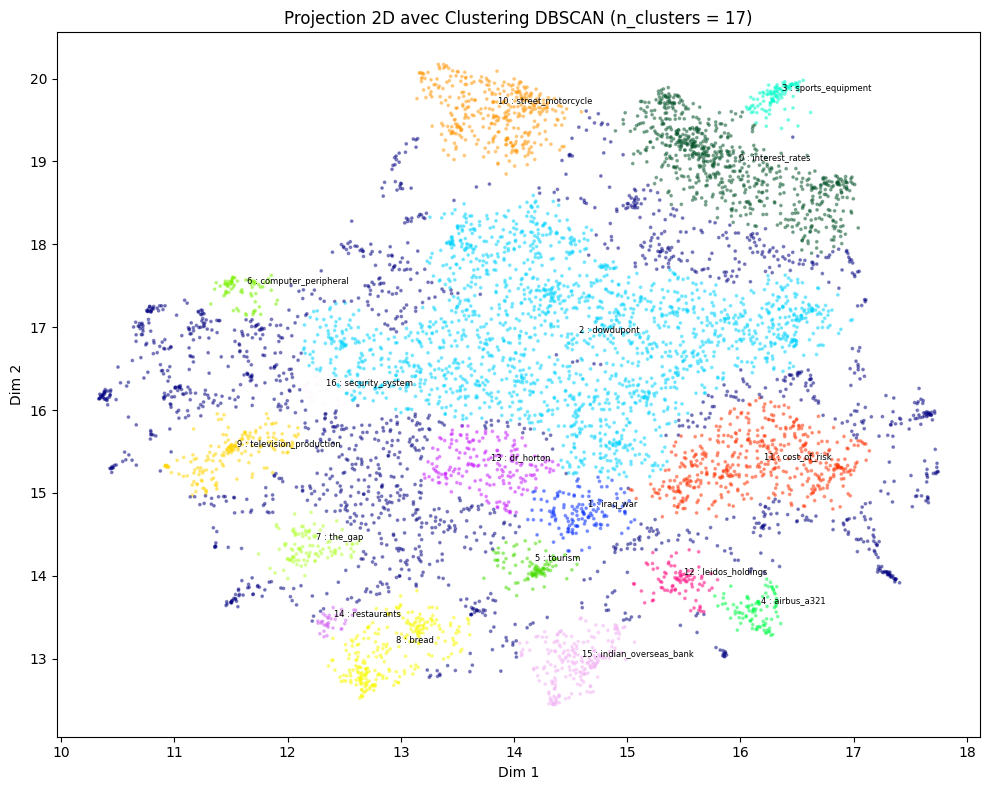

In [85]:
X_latent, labels =compute_latent_and_cluster(lift_matrix, selected_markers,markers_journals, out_prefix="SHOW", 
                                             eps_dbscan=0.27, min_samples_dbscan=50)

In [87]:
markers_from_cluster(labels, 2, selected_markers)

array(['local_air_temperature', 'feature_gender',
       'feature_student_status', ..., 'british_american_tobacco',
       'fine_chemicals', 'short_squeeze'], dtype='<U43')

## Exemple 1 : Tech

In [89]:
sub_selected_markers_tech = markers_from_cluster(labels, 2, selected_markers)
len(sub_selected_markers_tech), sub_selected_markers_tech

(1818,
 array(['local_air_temperature', 'feature_gender',
        'feature_student_status', ..., 'british_american_tobacco',
        'fine_chemicals', 'short_squeeze'], dtype='<U43'))

In [50]:
sub_lift_matrix_tech, sub_conv_tech = compute_sub_lift_matrix(sub_selected_markers_tech, filtered_marker_df)

INFO: Computing cocitation counts for 552324 entries, 214 markers, 170248 articles
computing cocitation counts: 100%|██████████| 170248/170248 [00:00<00:00, 250279.39it/s]


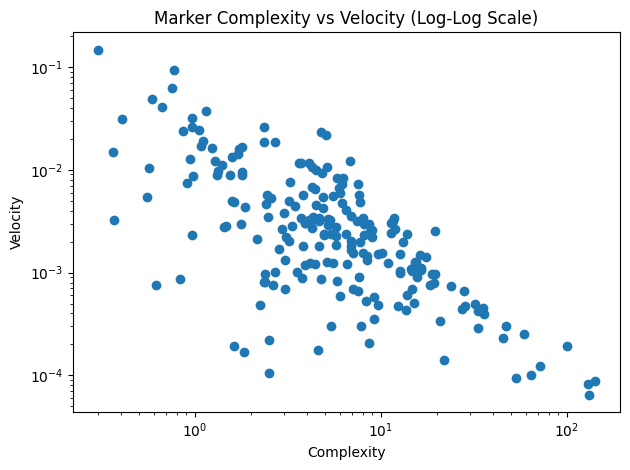

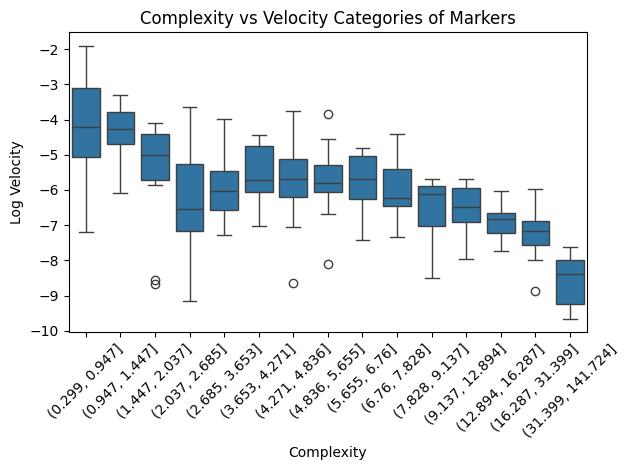

In [51]:
complexities_tech = plot_complexity_vs_velocity(sub_lift_matrix_tech, sub_conv_tech, sub_selected_markers_tech, out_prefix="SHOW")

In [52]:
complexity_df_tech = compute_complexity_df(complexities_tech)
complexity_df_tech

,complexity
marker,
speech,0.300472
mercury,0.361450
regulatory_scrutiny,0.366157
feature_compare_to_expectations,0.407307
pemex,0.552703
...,...
postal_savings_bank_china,72.027351
china_shenhua_energy,99.852292
finished_gasoline,130.393833


In [25]:
top_lifters("core_i7", sub_lift_matrix_tech, sub_conv_tech, complexities_tech, top_n=15)

[('lenovo_thinkpad_x1_carbon', 126.83039832285115),
 ('elitegroup_computer_systems', 97.56184486373165),
 ('omen', 83.62443845462711),
 ('amd_ryzen_7', 75.20392208245981),
 ('amd_radeon_rx', 69.51281446540881),
 ('business_laptop', 60.678708390857494),
 ('microsoft_surface_pro', 40.37041856430275),
 ('windows_10', 38.27426221577164),
 ('amd_ryzen', 36.50563560546633),
 ('mini_pc', 33.53688417190775),
 ('gaming_computer', 31.682454775335536),
 ('geforce', 29.686013017173497),
 ('chromebook', 26.995267753556817),
 ('solid_state_drive', 23.31372300486486),
 ('ddr5_sdram', 22.229281108192023)]

In [26]:
top_lifters("geforce", sub_lift_matrix_tech, sub_conv_tech, complexities_tech , top_n=15)

[('omen', 45.153788932371675),
 ('lenovo_thinkpad_x1_carbon', 39.333967247754885),
 ('amd_radeon_rx', 35.95370443740095),
 ('amd_ryzen_7', 34.31478913541117),
 ('rtx', 33.07228187871767),
 ('core_i7', 29.686013017173497),
 ('gaming_computer', 26.991414380708086),
 ('amd_ryzen', 26.143747377473844),
 ('razer', 25.670303210724008),
 ('ddr5_sdram', 23.650170180612115),
 ('nvidia_blackwell', 23.43214953150368),
 ('business_laptop', 22.485118472420854),
 ('elitebook', 21.34902827591959),
 ('radeon', 21.07176816844012),
 ('mini_pc', 19.97428024300053)]

## Exemple 2 Voitures

In [55]:
sub_selected_markers_cars = markers_from_cluster(labels, 10, selected_markers)
len(sub_selected_markers_cars), sub_selected_markers_cars

(345,
 array(['city_bus', 'automobile_manufacturers', 'bicycle', 'scholarship',
        'sport_utility_vehicle', 'honda_motor_company', 'toyota',
        'charging_station', 'ford', 'volkswagen_corp', 'bmw_group',
        'street_motorcycle', 'mercedes_benz', 'operational_issues',
        'hyundai_motor_company', 'chassis_trailer', 'car_crash',
        'general_motors', 'stellantis', 'kia_brand', 'tata_motors',
        'tractor', 'world_war_2', 'product_recall', 'nissan_brand',
        'incentive_spending', 'hyundai_brand', 'chevrolet_brand',
        'scooter', 'ford_brand', 'heavy_rainfall', 'audi_brand',
        'maruti_suzuki', 'renault_brand', 'sugar_cane', 'porsche',
        'actuator', 'rivian', 'fuel_efficiency', 'toyota_brand', 'usps',
        'suzuki', 'ferrari', 'original_equipment_manufacturer',
        'car_sharing_industry', 'deere', 'braking_system', 'locomotive',
        'car_registrations', 'volvo_brand', 'byd', 'wait_time',
        'bmw_brand', 'driver_assistance_syste

In [56]:
sub_lift_matrix_cars, sub_conv_cars = compute_sub_lift_matrix(sub_selected_markers_cars, filtered_marker_df)

INFO: Computing cocitation counts for 606825 entries, 345 markers, 141849 articles
computing cocitation counts: 100%|██████████| 141849/141849 [00:00<00:00, 248735.05it/s]


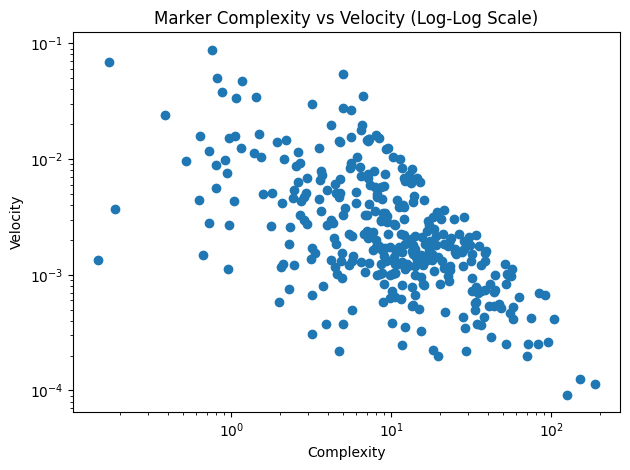

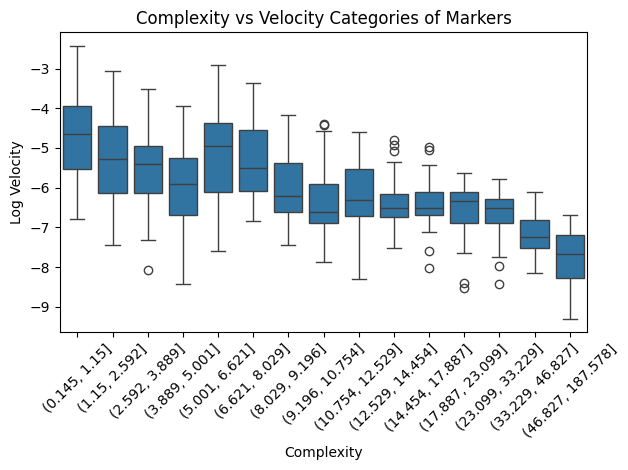

In [57]:
complexities_cars = plot_complexity_vs_velocity(sub_lift_matrix_cars, sub_conv_cars, sub_selected_markers_cars, out_prefix="SHOW")

In [58]:
complexity_df_cars = compute_complexity_df(complexities_cars)
complexity_df_cars

,complexity
marker,
matson,0.145974
scholarship,0.171949
mvc_capital,0.187704
heavy_rainfall,0.385834
security_risk,0.522034
...,...
shyft_group,95.393513
return_on_sales,104.207152
paccar_parts,125.121262


In [32]:
top_lifters("daihatsu_brand", sub_lift_matrix_cars, sub_conv_cars, complexities_cars , top_n=15)

[('brilliance_china_automotive_holdings', 933.2171052631578),
 ('ford_otosan', 829.5263157894739),
 ('mitsubishi_fuso_brand', 829.5263157894739),
 ('hino_motors', 704.6741407089152),
 ('shyft_group', 403.5533428165007),
 ('return_on_sales', 253.07582515611062),
 ('traton', 248.85789473684213),
 ('mazda_6', 240.83022071307303),
 ('tesla_powerwall', 226.23444976076553),
 ('hyundai_ioniq', 221.02510387811634),
 ('hyundai_santa_fe', 204.54073540014417),
 ('ford_super_duty', 199.0863157894737),
 ('toyota_land_cruiser', 193.07940108892922),
 ('cupra_brand', 184.79546638874413),
 ('honda_hrv', 171.6261343012704)]

In [33]:
top_lifters("automotive_chip", sub_lift_matrix_cars, sub_conv_cars, complexities_cars , top_n=15)

[('paccar_parts', 1479.5202086049544),
 ('daf', 686.9200968523003),
 ('shyft_group', 649.78928080623),
 ('psa_peugeot_citroen', 511.5362423368193),
 ('fisker_inc', 490.65721203735734),
 ('return_on_sales', 407.49497270899167),
 ('dealer_inventory', 392.5257696298859),
 ('wholesales_vehicle_sales', 362.9011832427247),
 ('kenworth', 315.3075854404001),
 ('agco', 315.3075854404001),
 ('fiat_chrysler', 302.4176527022705),
 ('brilliance_china_automotive_holdings', 300.5275423728813),
 ('tesla_powerwall', 291.4206471494607),
 ('peterbilt', 274.7680387409201),
 ('bmw_3_series', 264.20003725088475)]

### Research (bio)

In [37]:
sub_selected_markers_bio = markers_from_cluster(labels, 1, selected_markers)
len(sub_selected_markers_bio), sub_selected_markers_bio

(116,
 array(['higher_education', 'pharmaceuticals', 'feature_age', 'hospital',
        'conference', 'feature_education_level', 'prescription_drugs',
        'study_results', 'lawsuit', 'for_a_fee_or_free', 'coronavirus',
        'restriction', 'humanitarian_aid', 'clinical_trial', 'crops',
        'settlement', 'physical_discovery', 'secondary_offering',
        'biotechnology', 'venture_capital', 'pharmacy',
        'health_care_equipment', 'epidemic',
        'life_sciences_tools_services', 'patent', 'health_care_services',
        'press_conference', 'quality_of_life', 'company_creation',
        'investment_company', 'health_care_providers', 'seeds',
        'continuing_education', 'tax_credit', 'cardiovascular_disease',
        'reagent', 'attenuator', 'health_wellness_services',
        'personal_products', 'supplements', 'emerging_market', 'backlog',
        'anticompetitive_practices', 'healthcare_access',
        'industrial_park', 'diagnostic_test', 'coronavirus_vaccine',
 

In [38]:
sub_lift_matrix_bio, sub_conv_bio = compute_sub_lift_matrix(sub_selected_markers_bio, filtered_marker_df)

INFO: Total unique articles: 1185862
computing cocitation counts: 100%|██████████| 589520/589520 [00:02<00:00, 245023.58it/s]


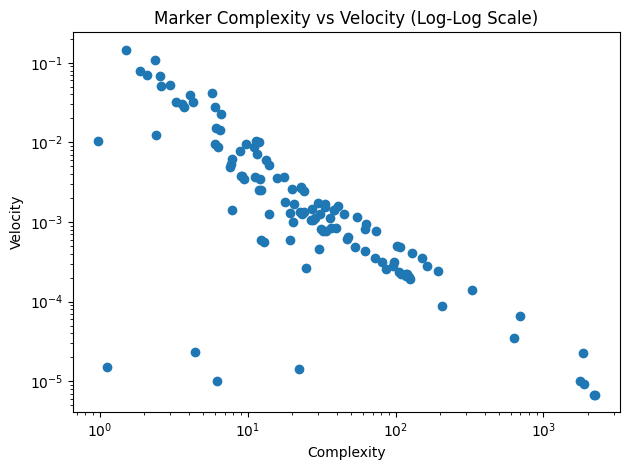

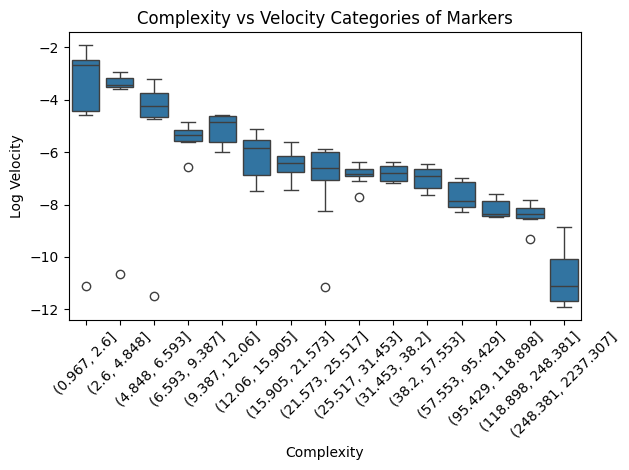

In [39]:
complexities_bio = plot_complexity_vs_velocity(sub_lift_matrix_bio, sub_conv_bio, sub_selected_markers_bio, out_prefix="SHOW")

In [41]:
complexity_df_bio = compute_complexity_df(complexities_bio)
complexity_df_bio

,complexity
marker,
shares_short,0.968213
cynata_therapeutics,1.127887
higher_education,1.507723
for_a_fee_or_free,1.864366
feature_education_level,2.078644
...,...
sinopharm_group,1758.315101
sinovac_biotech,1865.946613
mabpharm,1883.134792


## le truc de baptiste

In [61]:
sub_cocitation_probability_matrix_cars = compute_cocitation_probability_matrix(sub_selected_markers_cars, filtered_marker_df, sub_conv_cars)

INFO: Computing cocitation counts for 606825 entries, 345 markers, 141849 articles
computing cocitation counts: 100%|██████████| 141849/141849 [00:00<00:00, 247286.03it/s]


In [75]:
to_throw = []
for k in range(len(sub_cocitation_probability_matrix_cars)):
    if sub_cocitation_probability_matrix_cars[k, k] == 0:
        to_throw.append(sub_selected_markers_cars[k])
print(to_throw)
cocitation_probability_matrix = compute_cocitation_probability_matrix(sub_selected_markers_cars,filtered_marker_df, sub_conv_cars)
min_p = min([cocitation_probability_matrix[k, k] for k in range(len(cocitation_probability_matrix))])
max_p = max([cocitation_probability_matrix[k, k] for k in range(len(cocitation_probability_matrix))])
min_p, max_p

[]


INFO: Computing cocitation counts for 606825 entries, 345 markers, 141849 articles
computing cocitation counts: 100%|██████████| 141849/141849 [00:00<00:00, 246800.42it/s]


(9.16467511226727e-05, 0.08815007507983842)

In [76]:
eps = 9.16467511226727e-05

In [83]:
def h(x):
    if x == 0 or x == 1:
        return 0
    return -x*np.log2(x) - (1 - x)*np.log2(1 - x)

def mutual_information(marker_i, marker_j, cocitation_probability_matrix, conv):
    id_i, id_j = conv[marker_i], conv[marker_j]
    return h(cocitation_probability_matrix[id_j, id_j]) - h(cocitation_probability_matrix[id_i, id_j])

def mean_pred_power(marker_i, cocitation_probability_matrix, conv):
    id_i = conv[marker_i]
    acc = 0
    n = len(cocitation_probability_matrix)
    for j in range(n):
        if j != id_i:
            acc += mutual_information(marker_i, sub_selected_markers_cars[j], sub_cocitation_probability_matrix_cars, conv)
    return acc/(n - 1)

def get_complexity(marker, cocitation_probability_matrix, conv):
    ind = conv[marker]
    n_markers = len(cocitation_probability_matrix)
    alone_prob = cocitation_probability_matrix[ind, ind]
    if alone_prob == 0:
        return np.inf
    acc = 0
    for j in range(len(cocitation_probability_matrix)):
        if cocitation_probability_matrix[j, j] != 0 and j != ind:
            acc += cocitation_probability_matrix[ind, j]/ cocitation_probability_matrix[j, j]
    return acc/(alone_prob*(n_markers - 1))

def upper_bound(marker_i, cocitation_probability_matrix, eps, conv):
    id_i = conv[marker_i]
    complexity = get_complexity(marker_i, cocitation_probability_matrix, conv)
    n = len(cocitation_probability_matrix)
    f = np.log2((1 - eps)/eps)
    if complexity <= 1/(n - 1):
        return f*((1 - cocitation_probability_matrix[id_i, id_i])/(n - 1) - np.min(np.diag(cocitation_probability_matrix))*complexity) - max(0, mean_pred_power(marker_i, cocitation_probability_matrix, conv))
    if 1/(n - 1) < complexity <= 2/(n - 1):
        return f*((1 - cocitation_probability_matrix[id_i, id_i])/(n - 1) + np.min(np.diag(cocitation_probability_matrix))*(complexity - 2/(n - 1))) - max(0, mean_pred_power(marker_i, cocitation_probability_matrix, conv))
    else:
        return f*((1 - cocitation_probability_matrix[id_i, id_i])/(n - 1) + np.max(np.diag(cocitation_probability_matrix))*(complexity - 2/(n - 1))) - max(0, mean_pred_power(marker_i, cocitation_probability_matrix, conv))

mean_pred_power_tab = np.array([mean_pred_power(m, sub_cocitation_probability_matrix_cars, sub_conv_cars) for m in sub_selected_markers_cars])

gaps = [upper_bound(sub_selected_markers_cars[i], sub_cocitation_probability_matrix_cars, eps, sub_conv_cars) - mean_pred_power_tab[i] for i in range(len(sub_cocitation_probability_matrix_cars))]
complexities = [get_complexity(sub_selected_markers_cars[i], sub_cocitation_probability_matrix_cars, sub_conv_cars) for i in range(len(sub_cocitation_probability_matrix_cars))]

(array([167.,  91.,  29.,  22.,  13.,   8.,   4.,   3.,   2.,   1.,   1.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([1.26471258e-01, 1.12074737e+01, 2.22884762e+01, 3.33694786e+01,
        4.44504811e+01, 5.55314835e+01, 6.66124860e+01, 7.76934884e+01,
        8.87744909e+01, 9.98554933e+01, 1.10936496e+02, 1.22017498e+02,
        1.33098501e+02, 1.44179503e+02, 1.55260506e+02, 1.66341508e+02,
        1.77422511e+02, 1.88503513e+02, 1.99584515e+02, 2.10665518e+02,
        2.21746520e+02]),
 <BarContainer object of 20 artists>)

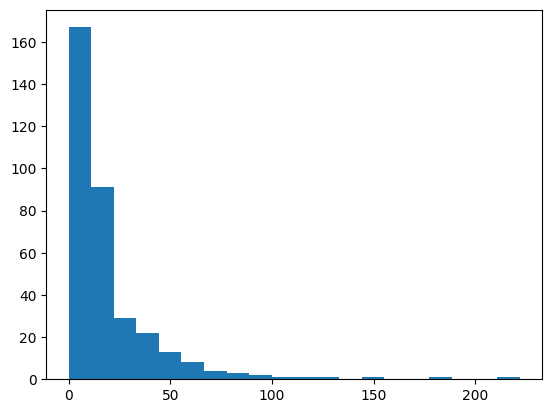

In [79]:
plt.hist(gaps, bins=20)

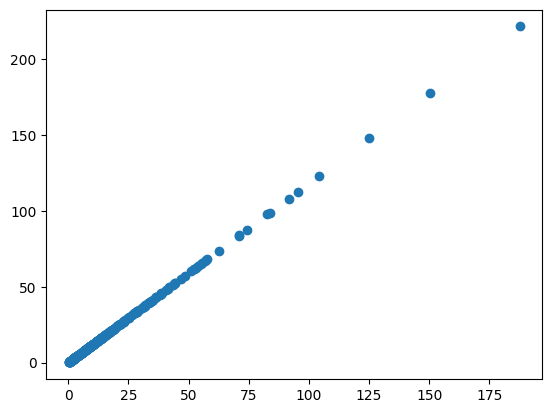

In [84]:
plt.plot(complexities, gaps, 'o')